## Analysis of a Car Sell Dataset Part 2

There are two goals in the second analysis task: (1), train linear regression models to predict the selling prices of cars; (2) assess the data ethics issues. There are *7* questions in this portfolio. 

The first goal involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned car_sells sub-dataset that **is different from** the one in “Analysis of a Car Sell Dataset” task 1. This goal covers Questions *1-6*. 

Question *7* is about data ethics issue.

In [1]:
your_name = "Krishna Nirmale"
your_student_id = "47748982"

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

### Q1: Import Cleaned Car Sell Dataset
The csv file named 'car_sells_clean_data.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [12]:
nitesh=pd.read_csv("car_sells_clean_data.csv")
print(nitesh.shape)

(3657, 8)


In [16]:
print("length of data: ",len(nitesh))

length of data:  3657


### Q2: Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict cars' selling prices given other columns, please get the correlations between year/km_driven/seller_type/fuel/owner and selling_price by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., seller_type and owner) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding selling_price. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for selling_price prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [46]:
nitesh.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seller_type_new,owner_new,fuel_new
0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner,1,0,1
1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner,1,0,1
2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner,1,0,0
3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner,1,0,1
4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner,1,1,0


In [48]:
nitesh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             3657 non-null   object 
 1   year             3657 non-null   float64
 2   selling_price    3657 non-null   int64  
 3   km_driven        3657 non-null   int64  
 4   fuel             3657 non-null   object 
 5   seller_type      3657 non-null   object 
 6   transmission     3657 non-null   object 
 7   owner            3657 non-null   object 
 8   seller_type_new  3657 non-null   int64  
 9   owner_new        3657 non-null   int64  
 10  fuel_new         3657 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 314.4+ KB


In [50]:
from sklearn.preprocessing import OrdinalEncoder
nitesh_ord=OrdinalEncoder(dtype=int)
nitesh['seller_type_new']=nitesh_ord.fit_transform(nitesh[['seller_type']])
nitesh[['seller_type','seller_type_new']].head(20)

,seller_type,seller_type_new
0,Individual,1
1,Individual,1
2,Individual,1
3,Individual,1
4,Individual,1
5,Individual,1
6,Individual,1
7,Individual,1
8,Individual,1
9,Individual,1


In [52]:
nitesh_ord=OrdinalEncoder(dtype=int)
nitesh['owner_new']=nitesh_ord.fit_transform(nitesh[['owner']])
nitesh[['owner','owner_new']].head(20)

,owner,owner_new
0,First Owner,0
1,First Owner,0
2,First Owner,0
3,First Owner,0
4,Second Owner,1
5,First Owner,0
6,Second Owner,1
7,First Owner,0
8,First Owner,0
9,First Owner,0


In [54]:
nitesh_ord=OrdinalEncoder(dtype=int)
nitesh['fuel_new']=nitesh_ord.fit_transform(nitesh[['fuel']])
nitesh[['fuel','fuel_new']].head(20)

,fuel,fuel_new
0,Petrol,1
1,Petrol,1
2,Diesel,0
3,Petrol,1
4,Diesel,0
5,Petrol,1
6,Petrol,1
7,Petrol,1
8,Petrol,1
9,Petrol,1


In [58]:
print(nitesh['fuel_new'].corr(nitesh['selling_price']))
print(nitesh['seller_type_new'].corr(nitesh['selling_price']))
print(nitesh['year'].corr(nitesh['selling_price']))
print(nitesh['owner_new'].corr(nitesh['selling_price']))
print(nitesh['km_driven'].corr(nitesh['selling_price']))

-0.27762704341734934
-0.20863704840276923
0.41110276220633124
-0.20552358731122453
-0.1772027798572389


In [60]:
# The correlation are weak 
# The most correlated is year and fuel 
# The least correlated is km_driven and owner

### Q3: Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please randomly split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [65]:
from sklearn.model_selection  import train_test_split
train_1, test_1 = train_test_split(nitesh,test_size=0.90,random_state=142)
print(train_1.shape)
print(test_1.shape)

(365, 11)
(3292, 11)


In [67]:
train_2, test_2 = train_test_split(nitesh,test_size=0.1,random_state=142)
print(train_2.shape)
print(test_2.shape)

(3291, 11)
(366, 11)


### Q4: Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding selling_price, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [72]:
from sklearn import linear_model
# Training the linear Regression using the training/testing data in case 1 with two most correlated input features
reg_nitesh_modela=linear_model.LinearRegression()
X_train_1=train_1[['year','fuel_new']]
y_train_1=train_1['selling_price']
reg_nitesh_modela.fit(X_train_1, y_train_1)
print("y = x *" , reg_nitesh_modela.coef_, "+" , reg_nitesh_modela.intercept_)

y = x * [  70504.93020988 -272387.52340889] + -141270631.1520198


In [74]:
# Training the linear Regression using the training/testing data in case 1 with two least correlated input features
reg_nitesh_modelb=linear_model.LinearRegression()
X_train_1 =  train_1[['km_driven','owner_new']]
y_train_1 =  train_1['selling_price']
reg_nitesh_modelb.fit(X_train_1, y_train_1)
print("y = x *" , reg_nitesh_modelb.coef_, "+" , reg_nitesh_modelb.intercept_)

y = x * [-2.84937873e+00 -1.35019091e+05] + 768087.6850362453


In [76]:
# Training the linear Regression using the training/testing data in case 1 with two most correlated input features
reg_nitesh_modelc=linear_model.LinearRegression()
X_train_2  =  train_2[['year','fuel_new']]
y_train_2  =  train_2['selling_price']
reg_nitesh_modelc.fit(X_train_2, y_train_2)
print("y = x *" , reg_nitesh_modelc.coef_, "+" , reg_nitesh_modelc.intercept_)

y = x * [  52759.83492642 -251271.42877864] + -105592018.38618529


In [78]:
# Training the linear Regression using the training/testing data in case 1 with two least correlated input features
reg_nitesh_modeld=linear_model.LinearRegression()
X_train_2 =  train_2[['km_driven','owner_new']]
y_train_2 =  train_2['selling_price']
reg_nitesh_modeld.fit(X_train_2, y_train_2)
print("y = x *" , reg_nitesh_modeld.coef_, "+" , reg_nitesh_modeld.intercept_)

y = x * [-1.40959516e+00 -1.59106586e+05] + 655857.930192141


### Q5: Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [83]:
from sklearn.metrics import r2_score
X_test_1=test_1[['year','fuel_new']]
y_test_1=test_1['selling_price']
predicted = reg_nitesh_modela.predict(X_test_1)
mse1 = ((np.array(y_test_1)-predicted)**2).sum()/len(y_test_1)
rmse1=np.sqrt(mse1)
print("MSE:",mse1)
print("Root mse modelA: ", rmse1)

MSE: 237037203355.69217
Root mse modelA:  486864.6663660161


In [85]:
X_test_1=test_1[['km_driven','owner_new']]
y_test_1=test_1['selling_price']
predicted = reg_nitesh_modelb.predict(X_test_1)
mse2 = ((np.array(y_test_1)-predicted)**2).sum()/len(y_test_1)
rmse2=np.sqrt(mse2)
print("MSE:",mse2)
print("Root mse modelB: ", rmse2 )

MSE: 282106679257.3627
Root mse modelB:  531137.1567282435


In [87]:
X_test_2=test_2[['year','fuel_new']]
y_test_2=test_2['selling_price']
predicted = reg_nitesh_modelc.predict(X_test_2)
mse3 = ((np.array(y_test_2)-predicted)**2).sum()/len(y_test_2)
rmse3=np.sqrt(mse3)
print("MSE:",mse3)
print("Root mse modelC: ", rmse3 )

MSE: 182412290275.45175
Root mse modelC:  427097.51846089173


In [89]:
X_test_2=test_2[['km_driven','owner_new']]
y_test_2=test_2['selling_price']
predicted = reg_nitesh_modeld.predict(X_test_2)
mse4 = ((np.array(y_test_2)-predicted)**2).sum()/len(y_test_2)
rmse4=np.sqrt(mse4)
print("MSE:",mse4)
print("Root mse modelD: ", rmse4 )

MSE: 241892693210.4285
Root mse modelD:  491825.8769223398


### Q6: Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

In [91]:
nitesh_MSE=pd.DataFrame({'nitesh_MSE' : [mse1,mse2,mse3,mse4]},index =['mse1','mse2','mse3','mse4'])
nitesh_MSE

,nitesh_MSE
mse1,2.370372e+11
mse2,2.821067e+11
mse3,1.824123e+11
mse4,2.418927e+11


In [93]:
nitesh_RMSE=pd.DataFrame({'nitesh_RMSE' : [rmse1,rmse2,rmse3,rmse4]},index =['rmse1','rmse2','rmse3','rmse4'])
nitesh_RMSE

,nitesh_RMSE
rmse1,486864.666366
rmse2,531137.156728
rmse3,427097.518461
rmse4,491825.876922


<BarContainer object of 4 artists>

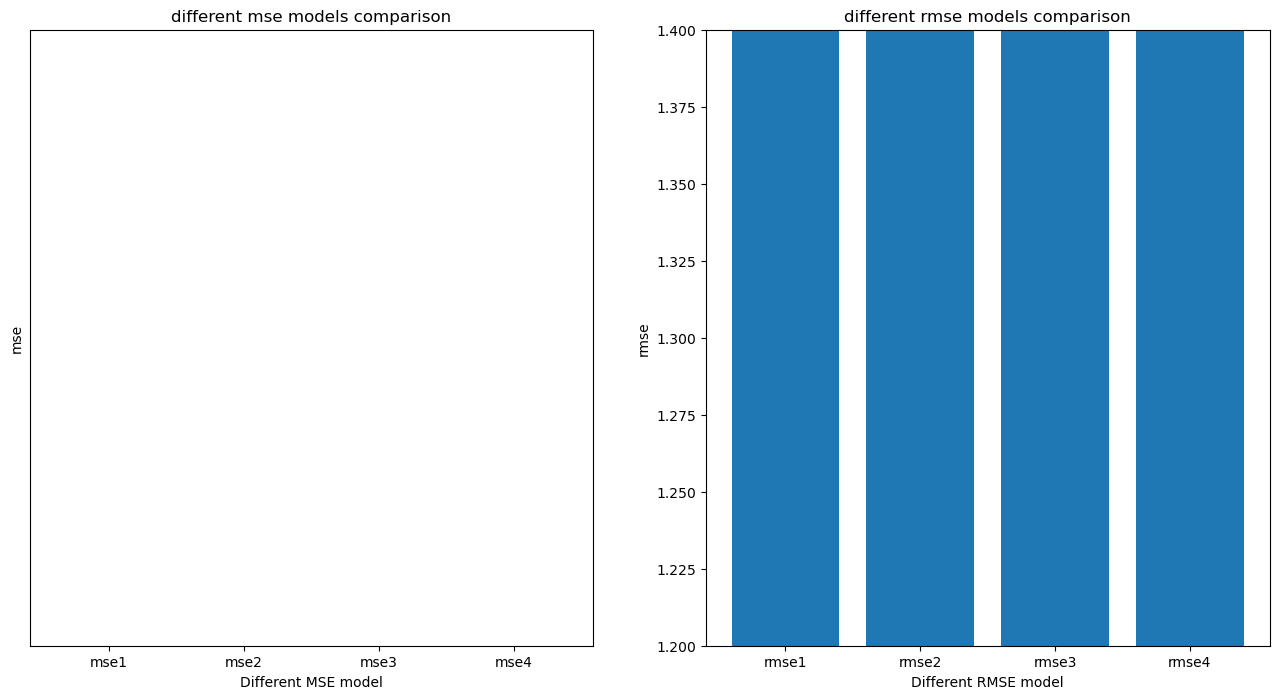

In [97]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.xlabel("Different MSE model")
plt.ylabel("mse")
plt.ylim(1.6,1.9)
plt.title("different mse models comparison")
plt.bar(data=nitesh_MSE,x=['mse1','mse2','mse3','mse4'],height='rahul_MSE',color='indianred')


plt.subplot(1,2,2)
plt.xlabel("Different RMSE model")
plt.ylabel("rmse")
plt.ylim(1.6,1.9)
plt.title("different rmse models comparison")
plt.ylim(1.2,1.4)
plt.bar(data=nitesh_RMSE,x=['rmse1','rmse2','rmse3','rmse4'],height='nitesh_RMSE')

### Q7: Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.
